In [153]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [154]:
import torch
import torchvision
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt

from DatasetFetcher import DatasetFetcher
from project1_model import *

In [155]:
# Check available device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [156]:
# Get Model
model = project1_model()
model.load_state_dict(torch.load("./project1_model.pt"))
model = model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential

In [157]:
params = np.load("./trainNormalizedParameters.npz")
mean, std = params['mean'], params['std']

In [158]:
classes = {0 : "airplane", 1 : "automobile", 2 : "bird", 3 : "cat", 4 : "deer", 5 : "dog", 6 : "frog", 7 : "horse", 8 : "ship", 9 : "truck"}

In [159]:
def getImage(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(img)
    img = cv2.resize(img, (32, 32))
    img = torchvision.transforms.functional.to_tensor(img)
    img = torchvision.transforms.functional.normalize(img, mean=mean, std=std)
    img = img.unsqueeze(0)
    img = img.to(device)
    return img

In [160]:
def predict(url):
    img = getImage(url)
    output = model(img)
    label_predicted = torch.argmax(model(img), dim=1).item()
    class_predicted = classes[label_predicted]
    return output, label_predicted, class_predicted

In [161]:
urls = [
        "https://upload.wikimedia.org/wikipedia/commons/1/11/Freightliner_M2_106_6x4_2014_%2814240376744%29.jpg",
        "https://cdn.britannica.com/41/123141-050-E6229449/Air-New-Zealand-Boeing-747-400.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/e/ea/Marsh_frog_%28Pelophylax_ridibundus%29.jpg",
        "https://sniteartmuseum.nd.edu/assets/166204/original/ferrari.jpg",
        "https://www1.nyc.gov/assets/wildlifenyc/images/content/pages/Stag_On_A_Hill.jpg",
        "https://www.thesprucepets.com/thmb/NHntnh4WXKd-5ynEG4cRrjprDYA=/2109x1186/smart/filters:no_upscale()/GettyImages-909948608-5c69cd9446e0fb0001560d1a.jpg",
        "https://i.guim.co.uk/img/media/26392d05302e02f7bf4eb143bb84c8097d09144b/446_167_3683_2210/master/3683.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=49ed3252c0b2ffb49cf8b508892e452d",
        "https://www.akc.org/wp-content/uploads/2017/11/Carolina-Dog-standing-outdoors.jpg",
        "https://www.allaboutbirds.org/news/wp-content/uploads/2020/07/STanager-Shapiro-ML.jpg",
        "https://i.insider.com/5cbf50dfd1a2f8074406a8b2?width=1136&format=jpeg"
        ]

tensor([[-34.2883, -11.9520, -28.5886, -36.4965, -35.1839, -42.5324, -20.5523,
         -31.2186, -33.6017,  20.0499]], device='cuda:0',
       grad_fn=<AddmmBackward0>) 9 truck
tensor([[ 12.8268, -24.6949, -37.3763, -21.8729, -35.8002, -39.5491, -45.3504,
         -22.6809, -37.0802, -26.6606]], device='cuda:0',
       grad_fn=<AddmmBackward0>) 0 airplane
tensor([[-40.9545, -58.8403,   7.5109, -11.0248, -18.0814, -39.2071,   3.6967,
         -41.3941, -22.4886, -44.7617]], device='cuda:0',
       grad_fn=<AddmmBackward0>) 2 bird
tensor([[-28.2459,  24.1672, -41.2204, -33.2753, -55.9625, -50.1680, -22.5963,
         -39.8395, -25.0216,  -8.2429]], device='cuda:0',
       grad_fn=<AddmmBackward0>) 1 automobile
tensor([[-35.7742, -43.3396, -22.8651, -18.3370,   5.1422,  -9.6903, -21.7559,
          -0.8192, -32.3473, -35.6981]], device='cuda:0',
       grad_fn=<AddmmBackward0>) 4 deer
tensor([[-32.9056, -47.4458,  -7.5343, -28.8645, -34.0246, -18.8975, -46.1821,
           0.1484, -37.60

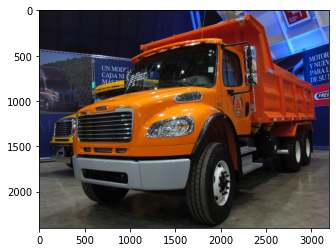

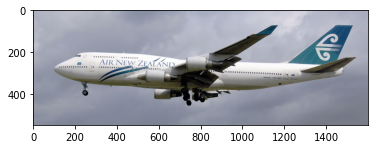

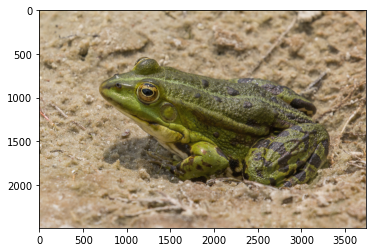

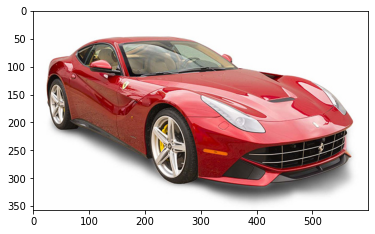

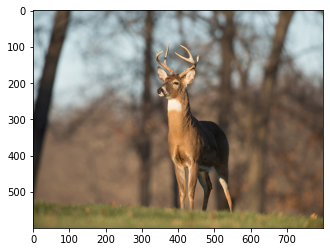

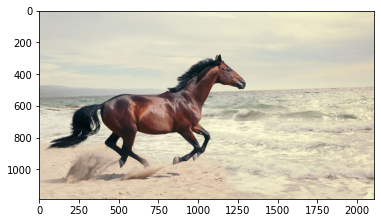

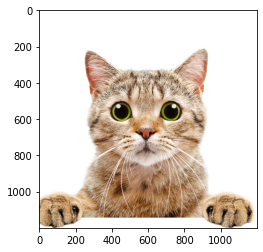

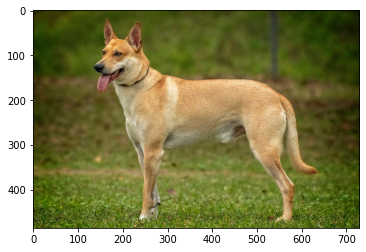

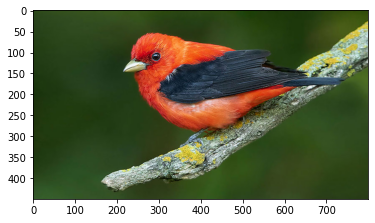

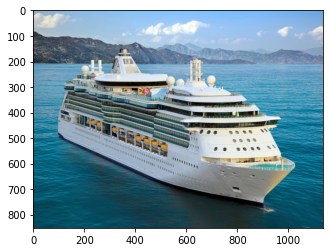

In [162]:
for url in urls:
    output, label, classPredicted = predict(url)
    print(output, label, classPredicted)